# Data Science and Visualization (RUC F2023)

## Lecture 6: Regression

 # Decision Tree Regression
 
 We use the Boston Housing dataset in this example. A detailed exaplantion of the dataset is at [here](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

## 0. Importing the Required Libraries and Data

In [4]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('BostonHousing.csv')

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The 14 attributes in the dataset:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per \$10,000
* **PTRATIO** - pupil-teacher ratio by town
* **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** - **percentage** of the lower status of the population
* **MEDV** - **Median** value of owner-occupied homes in $1000's

In [6]:
data.shape

(506, 14)

## 1. Feature Selection

We focus on two columns only.

In [7]:
X = data[['lstat']]
y = data['medv']

Let's see the relation between LSTAT and MEDV by a plot.

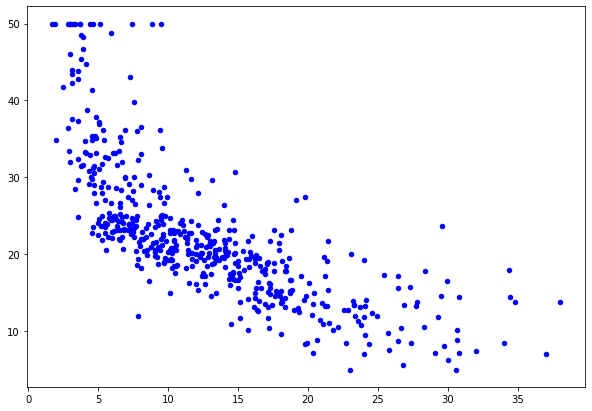

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y, color='blue', s=20)

It seems neither a linear or a polynomial regressor will work here. 

## 2. Data Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

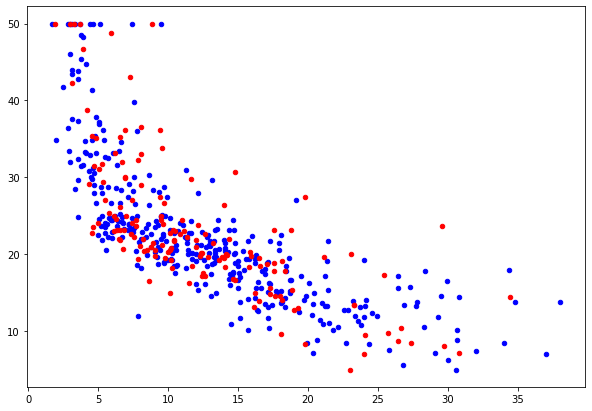

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, color='blue', s=20)
plt.scatter(X_test, y_test, color='red', s=20)

## 3. A Decision Tree Regressor

Create and train the model on the training data:

In [11]:
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

# Sort X and y by ascending values of X
X_train = X_train.sort_values(by=['lstat'])
y_train = y_train[X_train.index]

# Initialize and fit regressor
dtRegressor = DecisionTreeRegressor(criterion='mse', max_depth=3)         
dtRegressor.fit(X_train, y_train)

c:\Users\mathi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=3)

Use the model on the test data:

In [12]:
y_pred = dtRegressor.predict(X_test)
#y_pred

Let's obtain the **MAE**, **MSE** and **RMSE** for the regression result.

In [13]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.121236671978889
Mean Squared Error: 33.07481732381417
Root Mean Squared Error: 5.751070971898553


## 4. A Linear Regressor

As a comparison, we also use a linear regressor on the same training/test datasets.

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred2 = lr.predict(X_test)
#y_pred2

We also obtain the errors for the linear regression result. Each error is bigger than its counterpart obtained for the decisino tree regression above.

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 4.77198562852498
Mean Squared Error: 42.017090431829146
Root Mean Squared Error: 6.4820591197419


## 5. Visualization

Here, we plot the training data, the result of decision tree regression and linear regression on the same figure.

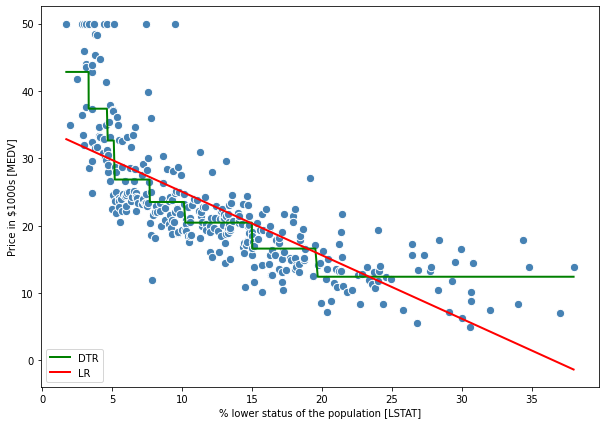

In [16]:
plt.figure(figsize=(10, 7))

# Plot actual target against the feature
plt.scatter(X_train, y_train, c='steelblue', edgecolor='white', s=70)

# Plot predicted target against the feature (Decision tree regression)
plt.plot(X_train['lstat'].values, dtRegressor.predict(X_train), color='green', lw=2, label="DTR")

# Plot predicted target against the feature (Linear regression)
plt.plot(X_train['lstat'].values, lr.predict(X_train), color='red', lw=2, label="LR")

# Plot the legends
plt.legend(loc='lower left')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

As we can see in the plot, our decision tree regressor captures the general trend in the data much better than the linear regressor.

## References

* https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054